In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from pandas_profiling import profile_report

SEED =100
np.random.seed(SEED)

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
game_statistics = pd.read_csv("game_statistics.csv")

/home/sadkh/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19,20,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
train.head()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win
3,2017-01-25,1,14.0,ID_TR5M4KQV,Andromeda,Cigar,Away win
4,2016-08-24,1,15.0,ID_EOIECRE2,Andromeda,Circinus,Home Win


In [5]:
test.head()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team
0,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7
1,2018-09-11,3,18.0,ID_H49BIKG7,Cosmos Redshift 7,Tadpole
2,2018-09-25,3,32.0,ID_PO6SP4VA,Cosmos Redshift 7,Medusa Merger
3,2018-10-02,3,40.0,ID_MZRCNBAQ,Cartwheel,Cosmos Redshift 7
4,2018-12-20,3,123.0,ID_CV9VOLIU,Cosmos Redshift 7,Needle


In [6]:
game_statistics.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,...,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,Ryoichi,Backward,...,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,Ryoichi,Backward,...,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       412 non-null    object 
 1   Season     412 non-null    int64  
 2   Match_ID   412 non-null    float64
 3   Game_ID    412 non-null    object 
 4   Home Team  412 non-null    object 
 5   Away Team  412 non-null    object 
 6   Score      412 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       234 non-null    object 
 1   Season     234 non-null    int64  
 2   Match_ID   234 non-null    float64
 3   Game_ID    234 non-null    object 
 4   Home Team  234 non-null    object 
 5   Away Team  234 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.1+ KB


In [9]:
game_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428101 entries, 0 to 2428100
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Game_ID            object 
 1   Player_ID          object 
 2   id                 float64
 3   X                  float64
 4   Y                  float64
 5   Team               object 
 6   Action             object 
 7   Half               object 
 8   Manager            object 
 9   Opposition_Team    object 
 10  Shots              float64
 11  SoT                float64
 12  Goals_scored       float64
 13  Goals_conceded     float64
 14  Accurate passes    float64
 15  Inaccurate passes  float64
 16  Passes             float64
 17  Start_minutes      float64
 18  End_minutes        float64
 19  next_player        object 
 20  next_action        object 
 21  next_x             float64
 22  next_y             float64
 23  event_id           float64
 24  next_team          object 
 25  next_event_id     

## Data Analyis & Visualization

In [10]:
# train.profile_report()

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

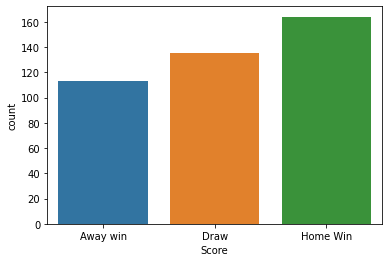

In [11]:
sns.countplot(train['Score'])

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Home Team', ylabel='count'>

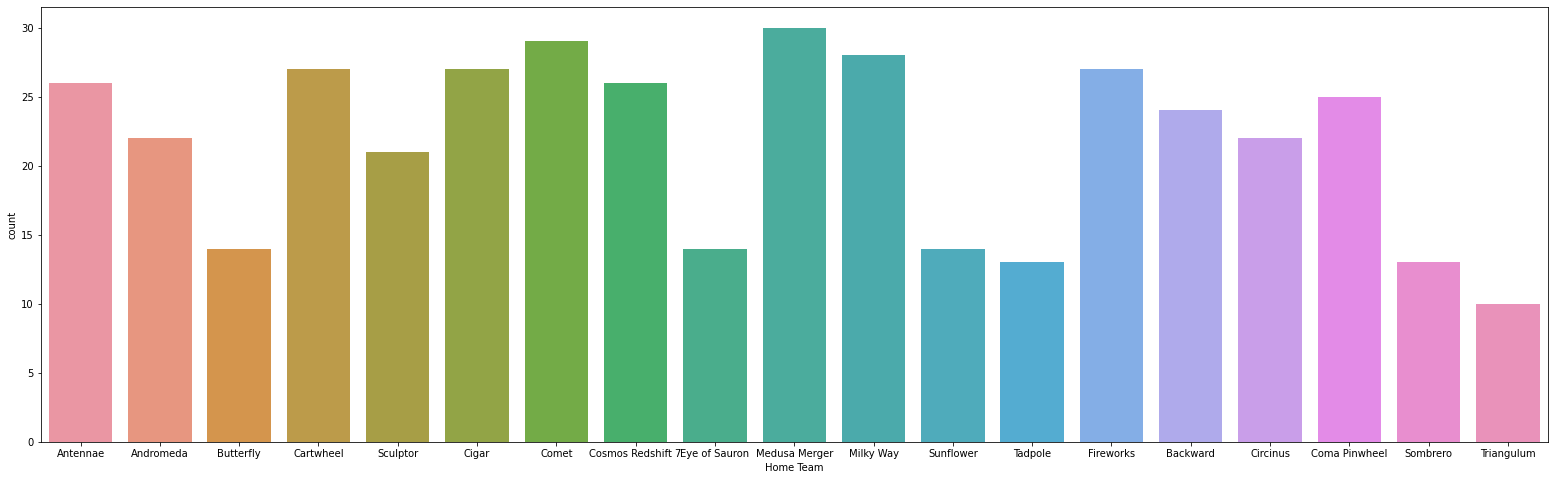

In [12]:
plt.figure(figsize=(27, 8))
sns.countplot(train['Home Team'])

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Away Team', ylabel='count'>

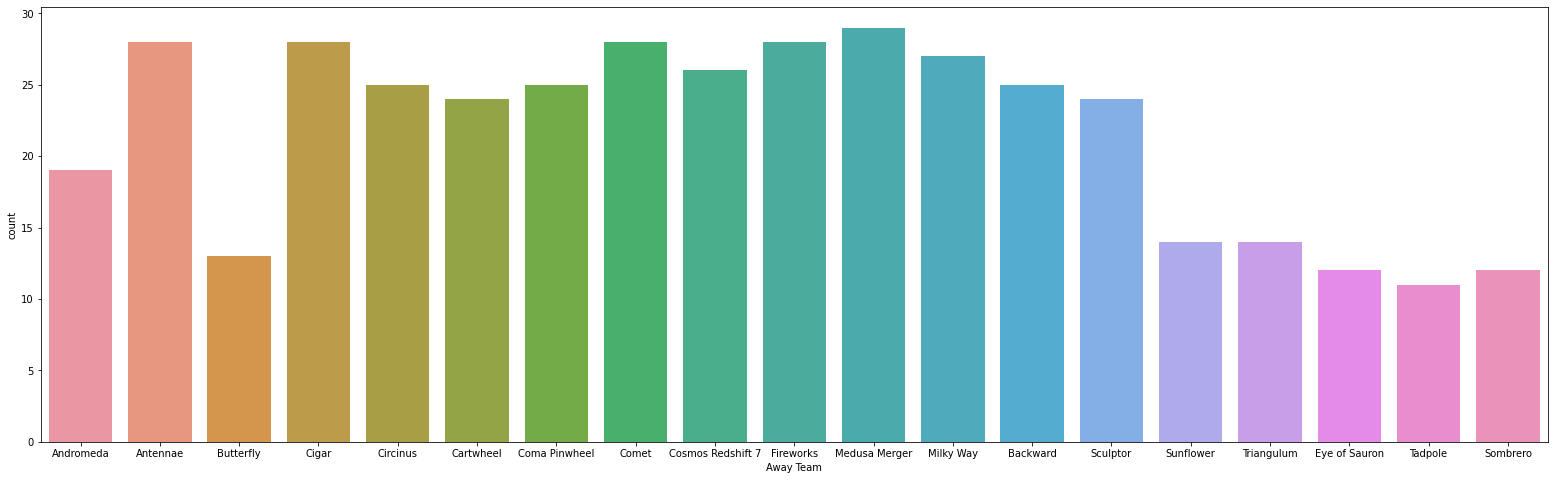

In [13]:
plt.figure(figsize=(27, 8))
sns.countplot(train['Away Team'])

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

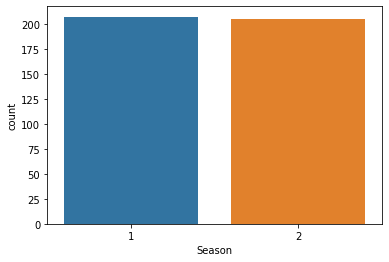

In [14]:
sns.countplot(train['Season'])

In [15]:
train['Home Team'].nunique()

19

In [16]:
train["Away Team"].nunique()

19

In [17]:
train["Match_ID"].nunique()

224

In [18]:
train["Game_ID"].nunique()

412

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Home Team', ylabel='count'>

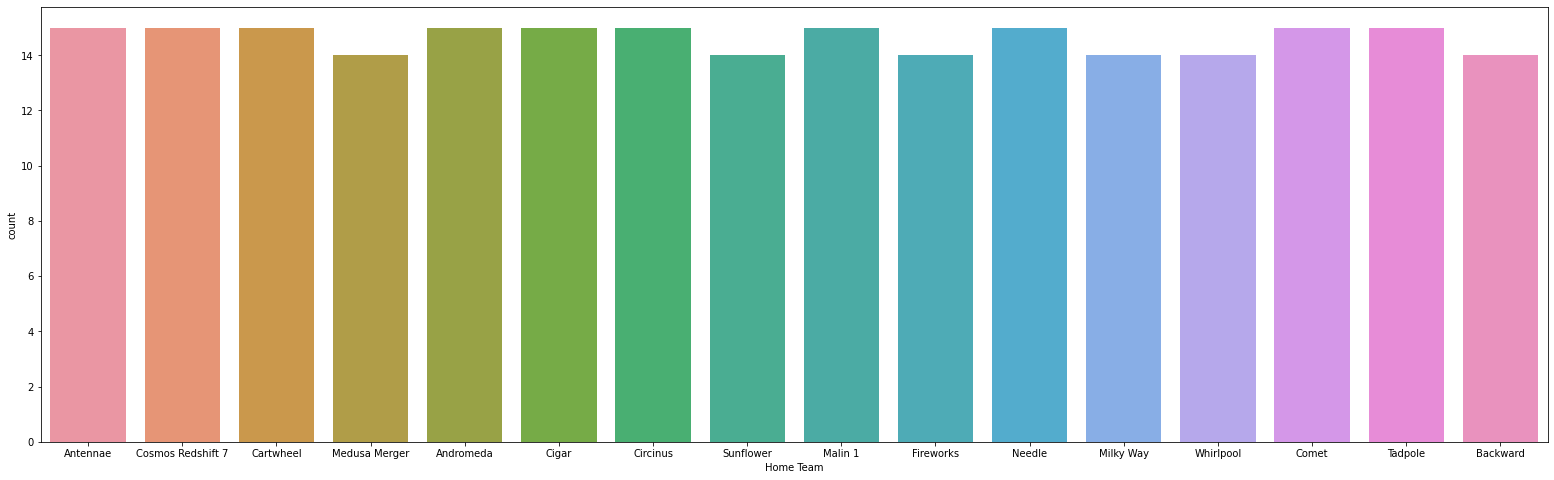

In [19]:
plt.figure(figsize=(27, 8))
sns.countplot(test['Home Team'])

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Away Team', ylabel='count'>

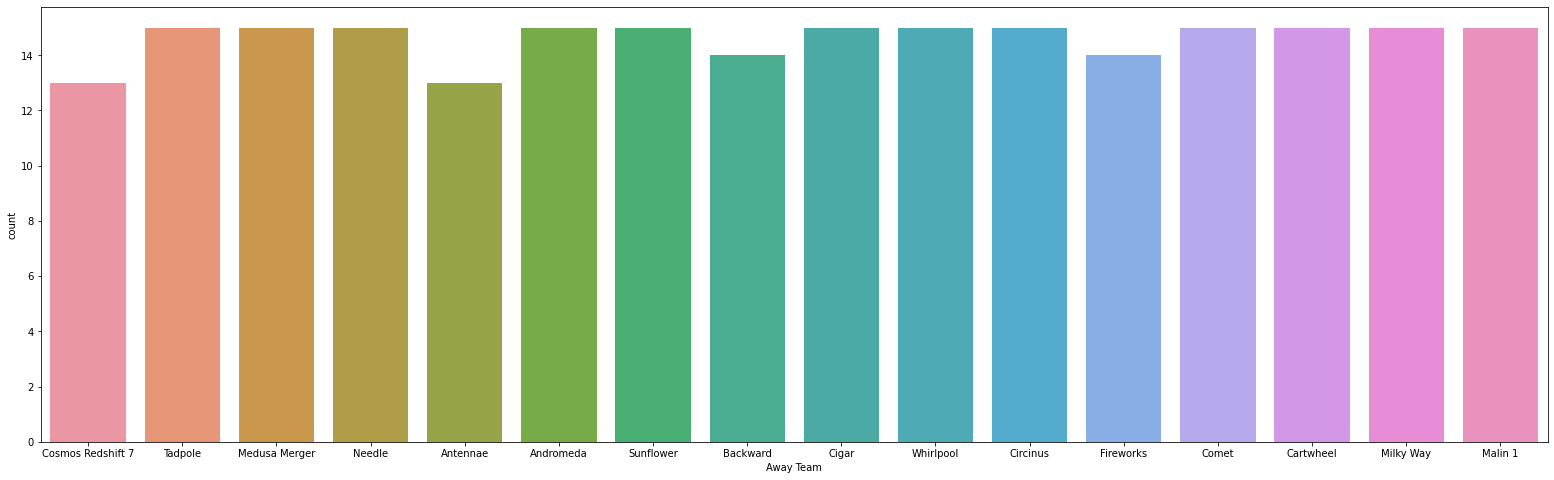

In [20]:
plt.figure(figsize=(27,8))
sns.countplot(test["Away Team"])

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

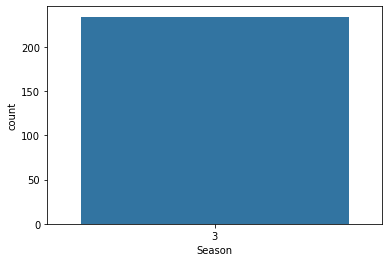

In [21]:
sns.countplot(test['Season'])

In [22]:
test["Home Team"].nunique()

16

In [23]:
test["Away Team"].nunique()

16

In [24]:
test["Match_ID"].nunique()

213

In [25]:
test["Game_ID"].nunique()

234

In [26]:
train.columns

Index(['Date', 'Season', 'Match_ID', 'Game_ID', 'Home Team', 'Away Team',
       'Score'],
      dtype='object')

In [27]:
test.columns

Index(['Date', 'Season', 'Match_ID', 'Game_ID', 'Home Team', 'Away Team'], dtype='object')

## Data Preprocesing

In [28]:
train["Train"] = 1
test["Train"] = 0

train_test = pd.concat([train, test])

In [29]:
train_test.tail(5)

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score,Train
229,2018-12-08,3,300.0,ID_QKQ00O16,Malin 1,Needle,NaN,0
230,2018-12-11,3,300.0,ID_172V2IXW,Tadpole,Needle,NaN,0
231,2018-12-22,3,300.0,ID_2ZK5TE39,Circinus,Malin 1,NaN,0
232,2019-05-07,3,300.0,ID_IS54QGW9,Needle,Andromeda,NaN,0
233,2019-05-14,3,300.0,ID_YG9IONLS,Tadpole,Circinus,NaN,0


In [30]:
len(train_test)

646

In [31]:
game_statistics.head(5)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,...,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,Ryoichi,Backward,...,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,Ryoichi,Backward,...,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
all_data = pd.merge(game_statistics, train_test, on="Game_ID")

In [33]:
all_data.shape

(2428101, 34)

In [34]:
all_data.sample(5)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,...,next_team,next_event_id,xt_value,Date,Season,Match_ID,Home Team,Away Team,Score,Train
1785278,ID_A0EALXUP,Player_3JRB0GFG,1753.0,62.3,55.2,Medusa Merger,Inaccurate passes,2nd half,Akuma/Inuyasha,Sunflower,...,Sunflower,1037.0,0.0,2018-09-19,3,25.0,Medusa Merger,Sunflower,NaN,0
747486,ID_PMX7KBOK,Player_M6RKVH8G,2495.0,43.4,7.6,Medusa Merger,Positional attacks,2nd half,Levi,Cigar,...,NaN,NaN,NaN,2016-10-27,1,152.0,Medusa Merger,Cigar,Away win,1
1176713,ID_JMKNLEUZ,Player_LY73FGIV,2885.0,1.1,60.6,Cosmos Redshift 7,Challenges won,2nd half,Kouki,Cartwheel,...,NaN,NaN,NaN,2016-09-28,1,117.0,Cosmos Redshift 7,Cartwheel,Draw,1
1731272,ID_AOLHJTW3,Player_93SHHX3N,3075.0,95.3,14.1,Tadpole,Throw-in attacks,2nd half,Daiki,Fireworks,...,Tadpole,1758.0,0.0,2019-02-16,3,135.0,Fireworks,Tadpole,NaN,0
2285372,ID_1Y735BT9,Player_UMEMIWZL,2321.0,78.5,5.4,Andromeda,Positional attacks,2nd half,Ryoichi,Antennae,...,Andromeda,1337.0,0.0,2018-09-22,3,30.0,Andromeda,Antennae,NaN,0


In [35]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2428101 entries, 0 to 2428100
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Game_ID            object 
 1   Player_ID          object 
 2   id                 float64
 3   X                  float64
 4   Y                  float64
 5   Team               object 
 6   Action             object 
 7   Half               object 
 8   Manager            object 
 9   Opposition_Team    object 
 10  Shots              float64
 11  SoT                float64
 12  Goals_scored       float64
 13  Goals_conceded     float64
 14  Accurate passes    float64
 15  Inaccurate passes  float64
 16  Passes             float64
 17  Start_minutes      float64
 18  End_minutes        float64
 19  next_player        object 
 20  next_action        object 
 21  next_x             float64
 22  next_y             float64
 23  event_id           float64
 24  next_team          object 
 25  next_event_id     

In [36]:
# msn.matrix(all_data)

In [37]:
all_data.isnull().sum() / len(all_data) 

Game_ID              0.000000
Player_ID            0.000000
id                   0.000000
X                    0.000000
Y                    0.000000
Team                 0.000000
Action               0.000004
Half                 0.000005
Manager              0.002307
Opposition_Team      0.000000
Shots                0.000038
SoT                  0.000038
Goals_scored         0.000038
Goals_conceded       0.000038
Accurate passes      0.000038
Inaccurate passes    0.000038
Passes               0.000038
Start_minutes        0.000004
End_minutes          0.000000
next_player          0.672909
next_action          0.672909
next_x               0.672909
next_y               0.672909
event_id             0.672820
next_team            0.672907
next_event_id        0.672909
xt_value             0.672820
Date                 0.000000
Season               0.000000
Match_ID             0.000000
Home Team            0.000000
Away Team            0.000000
Score                0.330340
Train     

In [38]:
train = all_data.loc[all_data["Train"] == 1].copy()
test = all_data.loc[all_data["Train"] == 0].copy()

In [39]:
train.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,...,next_team,next_event_id,xt_value,Date,Season,Match_ID,Home Team,Away Team,Score,Train
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,Ryoichi,Backward,...,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,Ryoichi,Backward,...,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1


In [40]:
test.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,...,next_team,next_event_id,xt_value,Date,Season,Match_ID,Home Team,Away Team,Score,Train
19031,ID_ZUPS2JD2,Player_5CBBVY85,1.0,52.5,34.0,Milky Way,Accurate passes,1st half,Masashi,Sunflower,...,Milky Way,1.0,-0.002220,2019-03-19,3,158.0,Sunflower,Milky Way,NaN,0
19032,ID_ZUPS2JD2,Player_5CBBVY85,2.0,52.5,34.0,Milky Way,Positional attacks,1st half,Masashi,Sunflower,...,Milky Way,0.0,0.000000,2019-03-19,3,158.0,Sunflower,Milky Way,NaN,0
19033,ID_ZUPS2JD2,Player_INTSA2WQ,3.0,37.5,30.9,Milky Way,Positional attacks,1st half,Masashi,Sunflower,...,Milky Way,1.0,0.000000,2019-03-19,3,158.0,Sunflower,Milky Way,NaN,0
19034,ID_ZUPS2JD2,Player_INTSA2WQ,4.0,37.5,30.9,Milky Way,Accurate passes,1st half,Masashi,Sunflower,...,Sunflower,2.0,0.016906,2019-03-19,3,158.0,Sunflower,Milky Way,NaN,0
19035,ID_ZUPS2JD2,Player_1AJ0QRLU,5.0,26.0,10.8,Sunflower,Positional attacks,1st half,Frodo,Milky Way,...,Milky Way,3.0,0.000000,2019-03-19,3,158.0,Sunflower,Milky Way,NaN,0


### Handling missing value

In [41]:
## Droping columns having very large no of missing values
train.drop(["next_player", "next_action", "next_x", "next_y", "event_id", "next_team", "next_event_id", "xt_value", "Train"], axis=1, inplace=True)
test.drop(["next_player", "next_action", "next_x", "next_y", "event_id", "next_team", "next_event_id", "xt_value", "Train", "Score"], axis=1, inplace=True)

In [42]:
train.isnull().sum()

Game_ID              0
Player_ID            0
id                   0
X                    0
Y                    0
Team                 0
Action               0
Half                 0
Manager              0
Opposition_Team      0
Shots                0
SoT                  0
Goals_scored         0
Goals_conceded       0
Accurate passes      0
Inaccurate passes    0
Passes               0
Start_minutes        0
End_minutes          0
Date                 0
Season               0
Match_ID             0
Home Team            0
Away Team            0
Score                0
dtype: int64

In [43]:
test.isnull().sum()

Game_ID                 0
Player_ID               0
id                      0
X                       0
Y                       0
Team                    0
Action                 10
Half                   11
Manager              5602
Opposition_Team         0
Shots                  92
SoT                    92
Goals_scored           92
Goals_conceded         92
Accurate passes        92
Inaccurate passes      92
Passes                 92
Start_minutes          10
End_minutes             0
Date                    0
Season                  0
Match_ID                0
Home Team               0
Away Team               0
dtype: int64

In [44]:
test["Start_minutes"].median()

46.78

In [45]:
# Filling nan values in categorical with mode
test["Action"].fillna(test["Action"].mode()[0], inplace=True)
test["Half"].fillna(test["Half"].mode()[0], inplace=True)
test["Manager"].fillna(test["Manager"].mode()[0], inplace=True)

# Filling nan values with median
test["Shots"].fillna(test["Shots"].median(), inplace=True)
test["SoT"].fillna(test["SoT"].median(), inplace=True)
test["Goals_scored"].fillna(test["Goals_scored"].median(), inplace=True)
test["Goals_conceded"].fillna(test["Goals_conceded"].median(), inplace=True)
test["Accurate passes"].fillna(test["Accurate passes"].median(), inplace=True)
test["Inaccurate passes"].fillna(test["Inaccurate passes"].median(), inplace=True)
test["Passes"].fillna(test["Passes"].median(), inplace=True)
test["Start_minutes"].fillna(test["Start_minutes"].median(), inplace=True)

In [46]:
# Dropping columns having very few missing values
test.isnull().sum()

Game_ID              0
Player_ID            0
id                   0
X                    0
Y                    0
Team                 0
Action               0
Half                 0
Manager              0
Opposition_Team      0
Shots                0
SoT                  0
Goals_scored         0
Goals_conceded       0
Accurate passes      0
Inaccurate passes    0
Passes               0
Start_minutes        0
End_minutes          0
Date                 0
Season               0
Match_ID             0
Home Team            0
Away Team            0
dtype: int64

## Features Engineering

In [47]:
train.columns

Index(['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
       'Manager', 'Opposition_Team', 'Shots', 'SoT', 'Goals_scored',
       'Goals_conceded', 'Accurate passes', 'Inaccurate passes', 'Passes',
       'Start_minutes', 'End_minutes', 'Date', 'Season', 'Match_ID',
       'Home Team', 'Away Team', 'Score'],
      dtype='object')

In [48]:
test.columns

Index(['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
       'Manager', 'Opposition_Team', 'Shots', 'SoT', 'Goals_scored',
       'Goals_conceded', 'Accurate passes', 'Inaccurate passes', 'Passes',
       'Start_minutes', 'End_minutes', 'Date', 'Season', 'Match_ID',
       'Home Team', 'Away Team'],
      dtype='object')

In [49]:
# Converting Date column datatye to datetime 
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])

In [50]:
# Extracting day, month and year from date column
train["Year"] = train["Date"].dt.year
train["Month"] = train["Date"].dt.month
train["Day"] = train["Date"].dt.day
train.drop("Date", axis=1, inplace=True)


test["Year"] = test["Date"].dt.year
test["Month"] = test["Date"].dt.month
test["Day"] = test["Date"].dt.day
test.drop("Date", axis=1, inplace=True)

In [51]:
# Creating new feature "Total_shots"
train["Total_Shots"] = train["Shots"] + train["SoT"]
test["Total_Shots"] = test["Shots"] + test["SoT"]

In [52]:
# # Creating new feature "Total_min_played"
train["Total_min_played"] = train["End_minutes"] - train["Start_minutes"]
test["Total_min_played"] = test["End_minutes"] - test["Start_minutes"]

In [53]:
# Creating new feature "Total_goals"
train["Total_goals"] = train["Goals_scored"] + train["Goals_conceded"]
test["Total_goals"] = test["Goals_scored"] + test["Goals_conceded"]

In [54]:
# Creating new feature distance covered by baal from X to Y
train["Dist_X_Y"] = np.abs(train["Y"] - train["X"])
test["Dist_X_Y"] = np.abs(test["Y"] - test["X"])

In [55]:
# Extracting which half played from th "Half" column
# train["Half"] = train["Half"].str.extract(r'([12])').astype("int64")
# test["Half"] = test["Half"].str.extract(r'([12])').astype("int64")

In [56]:
train["Half"] = LabelEncoder().fit_transform(train["Half"])
test["Half"] = LabelEncoder().fit_transform(test["Half"])

In [57]:
train.columns

Index(['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
       'Manager', 'Opposition_Team', 'Shots', 'SoT', 'Goals_scored',
       'Goals_conceded', 'Accurate passes', 'Inaccurate passes', 'Passes',
       'Start_minutes', 'End_minutes', 'Season', 'Match_ID', 'Home Team',
       'Away Team', 'Score', 'Year', 'Month', 'Day', 'Total_Shots',
       'Total_min_played', 'Total_goals', 'Dist_X_Y'],
      dtype='object')

In [58]:
test.columns

Index(['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
       'Manager', 'Opposition_Team', 'Shots', 'SoT', 'Goals_scored',
       'Goals_conceded', 'Accurate passes', 'Inaccurate passes', 'Passes',
       'Start_minutes', 'End_minutes', 'Season', 'Match_ID', 'Home Team',
       'Away Team', 'Year', 'Month', 'Day', 'Total_Shots', 'Total_min_played',
       'Total_goals', 'Dist_X_Y'],
      dtype='object')

In [59]:
test.isnull().sum()

Game_ID              0
Player_ID            0
id                   0
X                    0
Y                    0
Team                 0
Action               0
Half                 0
Manager              0
Opposition_Team      0
Shots                0
SoT                  0
Goals_scored         0
Goals_conceded       0
Accurate passes      0
Inaccurate passes    0
Passes               0
Start_minutes        0
End_minutes          0
Season               0
Match_ID             0
Home Team            0
Away Team            0
Year                 0
Month                0
Day                  0
Total_Shots          0
Total_min_played     0
Total_goals          0
Dist_X_Y             0
dtype: int64

## Handling Categorical Features

In [60]:
train["Train"] = 1
test["Train"] = 0

In [61]:
train.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,...,Away Team,Score,Year,Month,Day,Total_Shots,Total_min_played,Total_goals,Dist_X_Y,Train
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,0,Ryoichi,Backward,...,Circinus,Home Win,2017,12,6,0.0,0.34,0.0,18.5,1
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,0,Ryoichi,Backward,...,Circinus,Home Win,2017,12,6,0.0,0.34,0.0,18.5,1
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,0,Ryoichi,Backward,...,Circinus,Home Win,2017,12,6,0.0,0.33,0.0,4.3,1
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,0,Ryoichi,Backward,...,Circinus,Home Win,2017,12,6,0.0,0.33,0.0,6.5,1
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,0,Ryoichi,Backward,...,Circinus,Home Win,2017,12,6,0.0,0.33,0.0,6.5,1


In [62]:
test.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,...,Home Team,Away Team,Year,Month,Day,Total_Shots,Total_min_played,Total_goals,Dist_X_Y,Train
19031,ID_ZUPS2JD2,Player_5CBBVY85,1.0,52.5,34.0,Milky Way,Accurate passes,0,Masashi,Sunflower,...,Sunflower,Milky Way,2019,3,19,0.0,0.34,0.0,18.5,0
19032,ID_ZUPS2JD2,Player_5CBBVY85,2.0,52.5,34.0,Milky Way,Positional attacks,0,Masashi,Sunflower,...,Sunflower,Milky Way,2019,3,19,0.0,0.34,0.0,18.5,0
19033,ID_ZUPS2JD2,Player_INTSA2WQ,3.0,37.5,30.9,Milky Way,Positional attacks,0,Masashi,Sunflower,...,Sunflower,Milky Way,2019,3,19,0.0,0.33,0.0,6.6,0
19034,ID_ZUPS2JD2,Player_INTSA2WQ,4.0,37.5,30.9,Milky Way,Accurate passes,0,Masashi,Sunflower,...,Sunflower,Milky Way,2019,3,19,0.0,0.33,0.0,6.6,0
19035,ID_ZUPS2JD2,Player_1AJ0QRLU,5.0,26.0,10.8,Sunflower,Positional attacks,0,Frodo,Milky Way,...,Sunflower,Milky Way,2019,3,19,0.0,0.33,0.0,15.2,0


In [63]:
train_test = pd.concat([train, test]) 

In [64]:
train_test.tail()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,...,Away Team,Score,Year,Month,Day,Total_Shots,Total_min_played,Total_goals,Dist_X_Y,Train
2420778,ID_03VRW8WV,Player_Y6ZZ2X44,3661.0,42.1,57.4,Antennae,Free-kick attacks,1,Elrick,Comet,...,Antennae,NaN,2018,11,28,0.0,0.34,0.0,15.3,0
2420779,ID_03VRW8WV,Player_Y6ZZ2X44,3662.0,42.1,57.4,Antennae,Passes into the penalty box,1,Elrick,Comet,...,Antennae,NaN,2018,11,28,0.0,0.34,0.0,15.3,0
2420780,ID_03VRW8WV,Player_6DVBNW9L,3663.0,7.5,19.6,Comet,Interceptions,1,Hideaki,Antennae,...,Antennae,NaN,2018,11,28,0.0,0.33,0.0,12.1,0
2420781,ID_03VRW8WV,Player_6DVBNW9L,3664.0,7.5,19.6,Comet,Free-kick attacks,1,Hideaki,Antennae,...,Antennae,NaN,2018,11,28,0.0,0.33,0.0,12.1,0
2420782,ID_03VRW8WV,Player_77KCLG39,3665.0,23.0,0.0,Comet,Accurate passes,1,Hideaki,Antennae,...,Antennae,NaN,2018,11,28,0.0,0.33,0.0,23.0,0


In [65]:
train_test.columns

Index(['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
       'Manager', 'Opposition_Team', 'Shots', 'SoT', 'Goals_scored',
       'Goals_conceded', 'Accurate passes', 'Inaccurate passes', 'Passes',
       'Start_minutes', 'End_minutes', 'Season', 'Match_ID', 'Home Team',
       'Away Team', 'Score', 'Year', 'Month', 'Day', 'Total_Shots',
       'Total_min_played', 'Total_goals', 'Dist_X_Y', 'Train'],
      dtype='object')

In [66]:
# Initializing ordinalencoder
oe = OrdinalEncoder()
le = LabelEncoder()

train_test["Player_ID"] = le.fit_transform(train_test[["Player_ID"]])
train_test["Team"] = le.fit_transform(train_test[["Team"]])
train_test["Action"] = le.fit_transform(train_test[["Action"]])
train_test["Manager"] = le.fit_transform(train_test[["Manager"]])
train_test["Home Team"] = le.fit_transform(train_test[["Home Team"]])
train_test["Away Team"] = le.fit_transform(train_test[["Away Team"]])
train_test["Opposition_Team"] = le.fit_transform(train_test[["Opposition_Team"]])

/home/sadkh/miniconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2428101 entries, 0 to 2420782
Data columns (total 32 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Game_ID            object 
 1   Player_ID          int64  
 2   id                 float64
 3   X                  float64
 4   Y                  float64
 5   Team               int64  
 6   Action             int64  
 7   Half               int64  
 8   Manager            int64  
 9   Opposition_Team    int64  
 10  Shots              float64
 11  SoT                float64
 12  Goals_scored       float64
 13  Goals_conceded     float64
 14  Accurate passes    float64
 15  Inaccurate passes  float64
 16  Passes             float64
 17  Start_minutes      float64
 18  End_minutes        float64
 19  Season             int64  
 20  Match_ID           float64
 21  Home Team          int64  
 22  Away Team          int64  
 23  Score              object 
 24  Year               int64  
 25  Month             

In [68]:
# Splitting training and testing set
train = train_test[train_test["Train"] == 1].copy()
test = train_test[train_test["Train"] == 0].copy()
test.drop("Score", axis=1, inplace=True)

In [69]:
train.shape

(1626003, 32)

In [70]:
test.shape

(802098, 31)

## Feature Slection

In [71]:
# columns = ["Team", "Manager", "Opposition_Team", "Season","Match_ID", "Home Team", "Away Team", "Year", "Month", "Day"]
# train_1 = train.loc[:, columns].copy()
# test_1 = test.loc[:, columns].copy()

In [72]:
# Initializing labelencoder
le = LabelEncoder()

# Splittind data into features and target
X = train.drop(["Score", "Game_ID"], axis=1)
y = le.fit_transform(train["Score"])

In [73]:
X.shape

(1626003, 30)

In [74]:
le.classes_

array(['Away win', 'Draw', 'Home Win'], dtype=object)

In [75]:
game_id = test["Game_ID"]
test.drop("Game_ID", axis=1, inplace=True)

# Training models

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.05, random_state=SEED)

In [77]:
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [78]:
# test_scaled = scaler.transform(test.values) 

In [79]:
X_train.shape

(1544702, 30)

In [80]:
X_test.shape

(81301, 30)

## RandomForest Classifier

In [81]:
# rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=SEED)
# rf.fit(X_train_scaled, y_train)

In [82]:
# preds = rf.predict(X_test_scaled)
# accuracy_score(y_test, preds)

In [83]:
# len(rf_feature_imp)

In [84]:
# len(X.columns)

In [85]:
# rf_feature_imp = rf.feature_importances_
# columns = X.columns

# plt.figure(figsize=(10, 20))
# sns.barplot(x=rf_feature_imp, y=columns, orient="h")
# plt.title("Random Forest Feature Importances")

In [86]:
# test_scaled = scaler.transform(test.drop("Game_ID", axis=1).values)
# preds_test = rf.predict(test_scaled)

# preds_test

In [87]:
# map_preds = {0:"Away win",
#             1:"Draw",
#             2:"Home Win"}

# score = np.array(list(map(lambda x: map_preds[x], preds_test)))
# print(score)

In [88]:
# sub = pd.DataFrame({"Game_ID": game_id,
#                    "Score": score})
# sub.head()

In [89]:
# sub.to_csv("rf_sub_2.csv", index=None)

## XGBoost Classifier

In [90]:
# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)

In [91]:
# preds = xgb.predict(X_test)
# accuracy_score(y_test, preds)

In [92]:
# test_scaled = scaler.transform(test.drop("Game_ID", axis=1).values)
# preds_test = xgb.predict(test_scaled)

# preds_test

In [93]:
# map_preds = {0:"Away win",
#             1:"Draw",
#             2:"Home Win"}

# score = np.array(list(map(lambda x: map_preds[x], preds_test)))
# print(score)

In [94]:
# sub = pd.DataFrame({"Game_ID": game_id,
#                    "Score": score})
# sub.head()

In [95]:
# sub.to_csv("xgb_2.csv", index=None)

## CatBoostClassifier

In [96]:
# cb = CatBoostClassifier()
# cb.fit(X_train, y_train)

Learning rate set to 0.115068
0:	learn: 1.0669318	total: 603ms	remaining: 10m 2s
1:	learn: 1.0400361	total: 962ms	remaining: 8m
2:	learn: 1.0182051	total: 1.26s	remaining: 7m
3:	learn: 0.9929044	total: 1.6s	remaining: 6m 37s
4:	learn: 0.9709733	total: 1.93s	remaining: 6m 24s
5:	learn: 0.9483112	total: 2.25s	remaining: 6m 12s
6:	learn: 0.9275845	total: 2.55s	remaining: 6m 1s
7:	learn: 0.9096054	total: 2.88s	remaining: 5m 56s
8:	learn: 0.8930444	total: 3.16s	remaining: 5m 47s
9:	learn: 0.8807295	total: 3.46s	remaining: 5m 42s
10:	learn: 0.8651052	total: 3.77s	remaining: 5m 39s
11:	learn: 0.8588791	total: 4.04s	remaining: 5m 32s
12:	learn: 0.8411739	total: 4.37s	remaining: 5m 31s
13:	learn: 0.8254544	total: 4.68s	remaining: 5m 29s
14:	learn: 0.8116027	total: 5s	remaining: 5m 28s
15:	learn: 0.7985680	total: 5.32s	remaining: 5m 27s
16:	learn: 0.7867401	total: 5.63s	remaining: 5m 25s
17:	learn: 0.7691585	total: 5.99s	remaining: 5m 26s
18:	learn: 0.7583099	total: 6.33s	remaining: 5m 26s
19:	l

In [97]:
# preds = cb.predict(X_test)
# print(f"accuracy_score: {accuracy_score(y_test, preds)}")

accuracy_score: 1.0


In [98]:
# preds_test = cb.predict(test.values)

# map_preds = {0:"Away win",
#             1:"Draw",
#             2:"Home Win"}

# score = np.array(list(map(lambda x: map_preds[x], preds_test.flatten())))
# sub = pd.DataFrame({"Game_ID": game_id,
#                    "Score": score})

In [99]:
# sub.shape

(802098, 2)

In [100]:
# sub.to_csv("cb.csv", index=None)

In [101]:
# cb.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.41147904,
        0.        ,  0.        ,  2.11999422,  0.60607296,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.95442502, 19.08229453,
       18.39993676, 21.96810284,  4.41670402, 11.90638141, 20.1346092 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

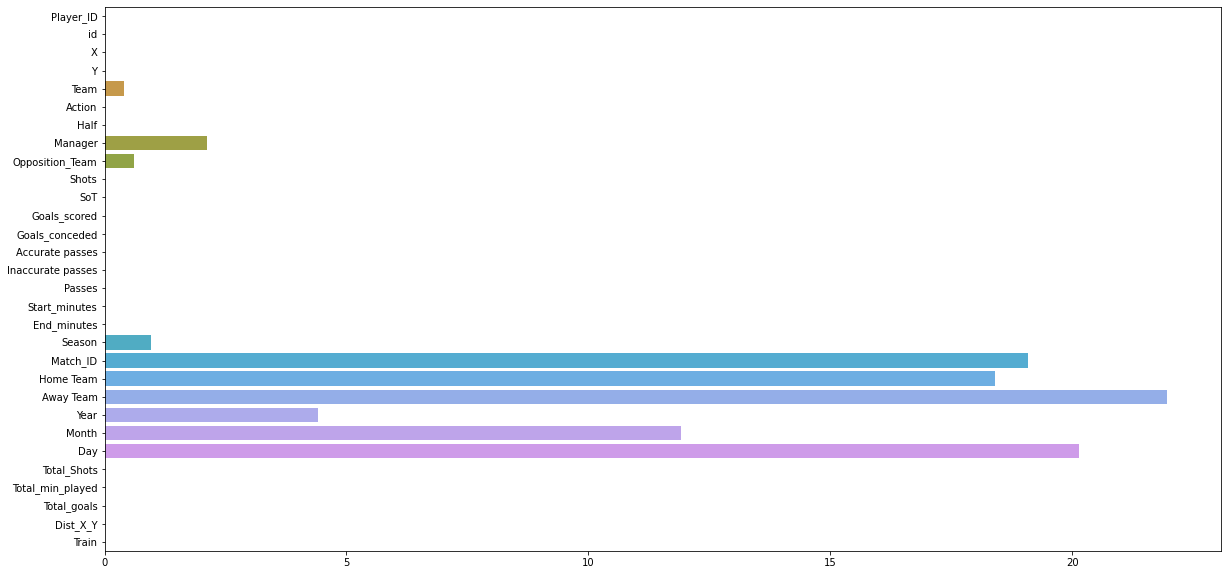

In [102]:
# plt.figure(figsize=(20, 10))
# sns.barplot(cb.feature_importances_, X.columns)